# Task 1

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [21]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [22]:
dataset = load_boston()
data = dataset["data"]

In [23]:
my_names = dataset["feature_names"]
my_table = pd.DataFrame(data, columns=my_names)
my_table

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [24]:
target = dataset["target"]
my_target_table = pd.DataFrame(target, columns=["target"])
my_target_table

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(my_table, my_target_table, test_size=0.30, random_state=42)

In [26]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [27]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

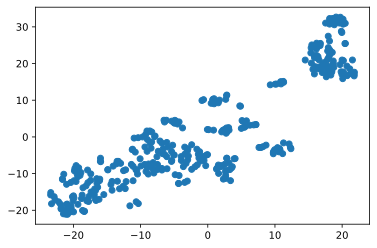

In [28]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

# Task 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [29]:
from sklearn.cluster import KMeans

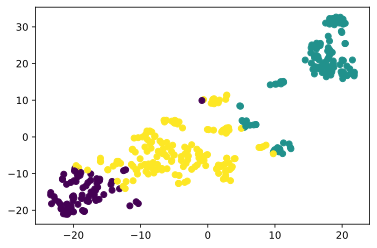

In [30]:
model = KMeans(n_clusters=3, random_state=42, max_iter=100)
labels_train = model.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [40]:
print('First Claster:', Y_train[labels_train == 0].mean())
print('Second Claster:', Y_train[labels_train == 1].mean())
print('Third Claster:', Y_train[labels_train == 2].mean())

First Claster: target    28.089189
dtype: float64
Second Claster: target    16.402632
dtype: float64
Third Claster: target    25.295783
dtype: float64


In [41]:
print('First Claster:', X_train['CRIM'][labels_train == 0].mean())
print('Second Claster:', X_train['CRIM'][labels_train == 1].mean())
print('Third Claster:', X_train['CRIM'][labels_train == 2].mean())

First Claster: 0.07632851351351352
Second Claster: 10.104631754385963
Third Claster: 0.42628686746987954


# Task 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [37]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [38]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

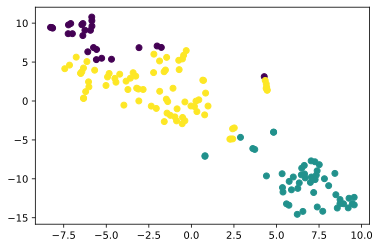

In [39]:
labels_test = model.fit_predict(X_test_scaled)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)
plt.show()

In [42]:
print('First Claster:', X_test['CRIM'][labels_test == 0].mean())
print('Second Claster:', X_test['CRIM'][labels_test== 1].mean())
print('Third Claster:', X_test['CRIM'][labels_test== 2].mean())

First Claster: 0.0685112
Second Claster: 11.743134897959182
Third Claster: 0.2945715384615385
